## Summary
Bellabeat - a high-tech manufacturer of health and wellness focused products for women. Although successful, Bellabeat can unlock new growth opportunities for the company and in order to do so, I as a data analyst have been assigned the task to gather insight into how consumers are using other smart devices. This will help guide the marketing strategy for the company.

## Ask Phase 

### Business Task 

Reveal more opportunities for growth (through advertising therefore sales) for Bellabeat by identifying trends in how consumers use non-Bellabeat smart devices.

### Stakeholders

- Executive Team - cofounders Urska Srsen and sando Mur
- Marketing team
- Analytics team

## Prepare Phase
The dataset is stored in Kaggle as [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) and available through Mobius

### Data Source

The dataset contains person fitness tracker data from 30 fibit users who consented to the submission of the personal tracker data. The data includes information such as heart rate, physical activity, sleep monitoring, steps and so on. The dataset was generated by respondents through a survey via Amazon Mechanical Turk between 03.12.2016 - 05.12.2016.

### Privacy, Security & Accessibility

The data is open source with no copyright and can be used publicly which means it can be copied, modified and distributed by the public.

### Data Integrity and Credibility

The data consists of responses from only 30 users which can be considered sample data and could potentially lead to sampling bias. We cannot determine for certain that the data is representative of the population of users of smart devices. Also, the data is old, from 2016 for a period of 2 months, the technology has surely changed since then.

## Process Phase

The tool of choice for this case study is R, to analyse due to working with a large dataset and to enable strong visualisations that will support the recommendations at the end of the project.

### Loading Libraries to set up environment

In [123]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
from pandas.api.types import CategoricalDtype
import seaborn as sns

In [124]:
import os

### Importing Datasets

In [125]:
daily_activity_data = pd.read_csv('/Users/mucha/Documents/MyPortfolio/Bellabeat_data/dailyActivity_merged.csv')
daily_steps_data = pd.read_csv('/Users/mucha/Documents/MyPortfolio/Bellabeat_data/dailySteps_merged.csv')
weightloginfo_data = pd.read_csv('/Users/mucha/Documents/MyPortfolio/Bellabeat_data/weightLogInfo_merged.csv')
daily_calories_data = pd.read_csv('/Users/mucha/Documents/MyPortfolio/Bellabeat_data/dailyCalories_merged.csv')
sleepday_data = pd.read_csv('/Users/mucha/Documents/MyPortfolio/Bellabeat_data/sleepDay_merged.csv')

In [126]:
hourly_steps = pd.read_csv('/Users/mucha/Documents/MyPortfolio/Bellabeat_data/hourlySteps_merged.csv')
hourly_calories = pd.read_csv('/Users/mucha/Documents/MyPortfolio/Bellabeat_data/hourlyCalories_merged.csv')

### Loading, Previewing & Summarising Datasets

In [127]:
print(daily_activity_data.info())
daily_activity_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Initial Observations:
- There are 940 daily activities recorded
- There are some 0.0 values in some of the columns such as the SedentaryActiveDistance & LoggedActivitesDistance columns
- The data type for 'ActivityDate' column could should be changed to a datetime data type

In [128]:
print(daily_steps_data.info())
daily_steps_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
None


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


Initial Observations:

- There are 940 daily steps entries recorded
- There is no missing data
- The data type for the ActivityDay should be changed to a datetime data type

In [129]:
print(weightloginfo_data.info())
weightloginfo_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB
None


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


Initial Observations:

- There are 67 entries recorded 
- There 'Fat' column contains missing values
- The data type for 'Date' column could should be changed to a datetime data type


In [130]:
print(daily_calories_data.info())
daily_calories_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
None


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


Initial Observations:

- There are 940 daily calories entries recorded
- There is no missing data
- The data types for the ActivityDay column could should be changed to a datetime data type

In [131]:
print(sleepday_data.info())
sleepday_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
None


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


Initial Observations:

- There are 413 daily sleep data recorded
- There is no missing data
- The data types for the 'SleepDay' column could should be changed to a datetime data type

In [132]:
print(hourly_steps.info())
hourly_steps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


Initial Observations:

There are 22099 hourly steps data recorded
There is no missing data
The data types for the 'ActivityHour' column could should be changed to a datetime data type

In [133]:
print(hourly_calories.info())
hourly_calories.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


Initial Observations:

There are 22099 hourly steps data recorded There is no missing data The data types for the 'ActivityHour' column could should be changed to a datetime data type

### Data Exploration

Here we check the number of unique users using the Id which is common in the 3 data frames. I also check the data for any duplicates, inconsistencies or any errors.

In [134]:
# check for duplicates
daily_activity_data.duplicated().sum()


0

In [135]:
daily_steps_data.duplicated().sum()

0

In [136]:
hourly_steps.duplicated().sum()

0

In [137]:
hourly_calories.duplicated().sum()

0

In [138]:
weightloginfo_data.duplicated().sum()

0

In [139]:
daily_calories_data.duplicated().sum()

0

In [140]:
# sleepday_data table has 3 duplicated values out of the 413 entries. This data can be deleted.
sleepday_data.duplicated().sum()

3

In [141]:
#deleting duplicates
sleepday_data = sleepday_data.drop_duplicates()

In [142]:
# checking for missing values 
daily_activity_data.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

daily_activity_data table is clean and does not contain any missing values in any of its columns.

In [143]:
daily_steps_data.isna().sum()

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

daily_steps_data table is clean and does not contain any missing values in any of its columns.

In [144]:
weightloginfo_data.isna().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [145]:
weightloginfo_data.drop(columns='Fat', inplace=True)
weightloginfo_data.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000


weightloginfo_data has 65 missing values in the 'Fat' column, but the other columns are complete and do not have any missing values. We will not be needing the 'Fat' Column in this analysis, therefore this column will be dropped

In [146]:
hourly_calories.isna().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

In [147]:
hourly_steps.isna().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [148]:
hourly_steps.isnull().values.sum()

0

In [149]:
# check how many unique users are there
hourly_steps.Id.nunique()

33

In [150]:
hourly_calories.Id.nunique()

33

In [151]:
daily_calories_data.isna().sum()

Id             0
ActivityDay    0
Calories       0
dtype: int64

daily_calories_data table is clean and does not contain any missing values in any of its columns.

In [152]:
sleepday_data.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

sleepday_data table is clean and does not contain any missing values in any of its columns.

### Data Transformation
Changing date format & renaming Date columns to Date

In [153]:
daily_activity_data.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


In [154]:
daily_activity_data['ActivityDate'] = pd.to_datetime(daily_activity_data['ActivityDate'])
daily_activity_data.rename(columns= {'ActivityDate':'Date'}, inplace=True)
daily_activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [155]:
daily_steps_data.head(3)

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460


In [156]:
daily_steps_data['ActivityDay'] = pd.to_datetime(daily_steps_data['ActivityDay'])
daily_steps_data.rename(columns= {'ActivityDay':'Date'}, inplace=True)
daily_steps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         940 non-null    int64         
 1   Date       940 non-null    datetime64[ns]
 2   StepTotal  940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [157]:
weightloginfo_data.head(3)

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000


In [158]:
weightloginfo_data['Date'] = pd.to_datetime(weightloginfo_data['Date'])
weightloginfo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   BMI             67 non-null     float64       
 5   IsManualReport  67 non-null     bool          
 6   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 3.3 KB


In [159]:
daily_calories_data.head(3)

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776


In [160]:
daily_calories_data['ActivityDay'] = pd.to_datetime(daily_calories_data['ActivityDay'])
daily_calories_data.rename(columns= {'ActivityDay':'Date'}, inplace=True)
daily_calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Id        940 non-null    int64         
 1   Date      940 non-null    datetime64[ns]
 2   Calories  940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [161]:
sleepday_data.head(3)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442


In [162]:
sleepday_data['SleepDay'] = pd.to_datetime(sleepday_data['SleepDay'])
sleepday_data.rename(columns= {'SleepDay':'Date'}, inplace=True)
sleepday_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   Date                410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.2 KB


In [163]:
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"])
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   StepTotal     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [164]:
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


### Merging Datasets

To be able to analyse the data better and faster, we merge datasets located in different data frames into one data frame.



We will merge the daily_activity_data dataframe and the sleepday_data dataframe in order to analyse whethere there is a correlation between Steps taken and calories burned. We will also merge the hourly_steps and hourly_calories datasets

In [165]:
activity_summary_df = pd.merge(daily_activity_data, sleepday_data, on=['Id','Date'], how='inner')
activity_summary_df 

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360
406,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527
407,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423
408,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545


In [166]:
# merge hourly_steps and hourly_calories
merged_df = pd.merge(hourly_steps, hourly_calories, on=['Id','ActivityHour'], how='inner')
merged_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


In [167]:
# extract day of week from Activity Hour in merged_df dataframe
merged_df['WeekDay'] = merged_df['ActivityHour'].dt.day_name()
merged_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


In [168]:
# extract hours from Activity Hour in merged_df dataframe
merged_df['Date_Hour'] = merged_df['ActivityHour'].dt.hour
merged_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,Date_Hour
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4


In [169]:
# we only want a column with the date since we have the Date_Hour column,so we extract the date from ActivityHour
merged_df["ActivityDay"] = merged_df["ActivityHour"].dt.date
merged_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,Date_Hour,ActivityDay
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0,2016-04-12
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1,2016-04-12
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2,2016-04-12
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3,2016-04-12
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4,2016-04-12


In [170]:
# we drop the ActivityHour column
merged_df = merged_df.drop("ActivityHour", axis = 1)
merged_df.head()

,Id,StepTotal,Calories,WeekDay,Date_Hour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [171]:
# last step is to make ActivityDay a datetime data type
merged_df["ActivityDay"] = pd.to_datetime(merged_df["ActivityDay"])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           22099 non-null  int64         
 1   StepTotal    22099 non-null  int64         
 2   Calories     22099 non-null  int64         
 3   WeekDay      22099 non-null  object        
 4   Date_Hour    22099 non-null  int64         
 5   ActivityDay  22099 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.2+ MB


## Analyse Phase

Our data has been clean, transformed and process. We can now analyse for insights and trends. The 2 Datasets /DataFrames i've chosen to analyse are:

activity_summary_df
merged_df

In [195]:
activity_summary_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,8514.909756,6.012390,6.007366,0.108867,1.446220,0.743902,3.791122,0.000927,25.046341,17.924390,216.541463,712.100000,2389.295122,1.119512,419.173171,458.482927
std,2.060863e+09,4157.375584,3.043946,3.039279,0.505523,1.992591,0.999806,1.720788,0.008685,36.218237,22.418593,86.705299,166.179395,758.435040,0.346636,118.635918,127.455140
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,5188.750000,3.592500,3.592500,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.250000,1841.000000,1.000000,361.000000,403.750000
50%,4.702922e+09,8913.000000,6.270000,6.270000,0.000000,0.570000,0.420000,3.665000,0.000000,9.000000,11.000000,208.000000,717.000000,2207.000000,1.000000,432.500000,463.000000
75%,6.962181e+09,11370.250000,8.005000,7.950000,0.000000,2.360000,1.037500,4.917500,0.000000,38.000000,26.750000,263.000000,782.750000,2920.000000,1.000000,490.000000,526.000000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000


In [196]:
merged_df.describe()

,Id,StepTotal,Calories,Date_Hour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


### Key Findings

1. The average calories burned daily is around 2304
2. There is a positive correlation between steps taken and calories burned
3. An average of 8514 total steps were taken by Fitbit users

## Share Phase
In this phase we will visualise our data and findings

### Correlation between total steps taken and calories burned

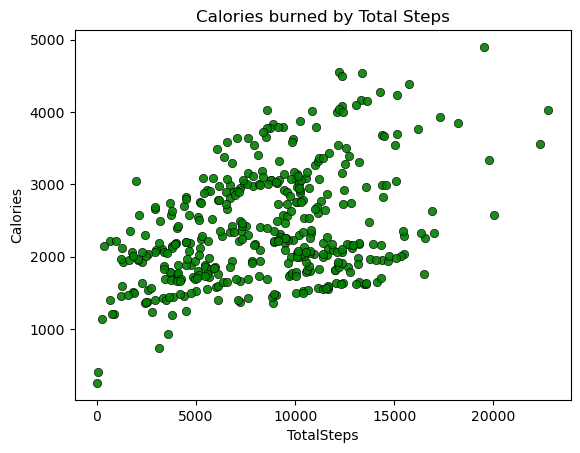

In [192]:
#correlation = pd.activity_summary_df({'x': 'TotalSteps', 'y':'Calories' })
plot = sns.scatterplot(x = "TotalSteps", y = "Calories", data = activity_summary_df, color='green',edgecolor='black', alpha=0.90)
plt.title("Calories burned by Total Steps")
plt.show()


From the visualisation we can see that there is a positive correlation between the steps taken by users and the calories burned. This implies that the more steps taken the more calories are burned.

### Steps Taken Throughout the Week

This will help us visualise whether users are taking the most or least amount of steps which means the most or least amount of activity. To do this, we need to first get the days of the week out of the date.

In [173]:
activity_summary_df['day_of_week'] = activity_summary_df['Date'].dt.day_name()

In [174]:
activity_summary_df.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,Wednesday
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,Friday
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,Saturday
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,Sunday


In [175]:
daily_steps = activity_summary_df.groupby('day_of_week')['TotalSteps'].mean()


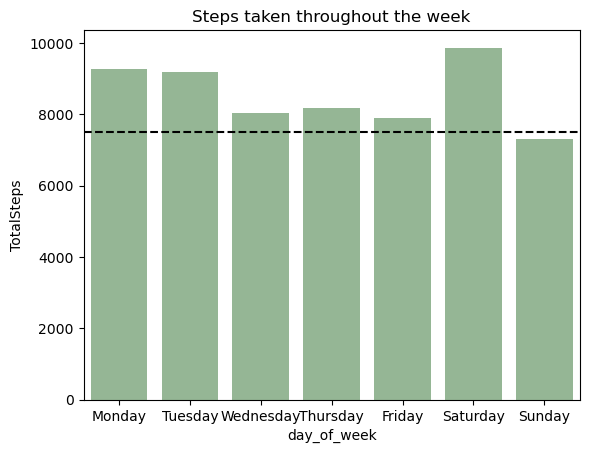

In [193]:
# visualise this in a bar plot
sns.barplot(x = "day_of_week", y = "TotalSteps", data = activity_summary_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],errorbar=None, color = "darkseagreen")
plt.axhline(y=7500, color='black', linestyle='--')
plt.title("Steps taken throughout the week")
plt.show()

The steps taken on Sundays are averaging lower than on other days. This correlates to the above analysis that most users seem to be taking longer to sleep on sundays. We can deduce that perhaps sundays are days when most users feel less need to be active and prefer to relax more to prepare for the following week. As we can see in the above bar chart that on Monday the daily steps increase quite significantly and follow through as such through the week reaching very high daily steps on Tuesdays and Saturdays.

### Total Time Asleep by Day of Week

In [177]:
sleep_time = activity_summary_df.groupby('day_of_week')['TotalMinutesAsleep'].mean()

In [178]:
sleep_time

day_of_week
Friday       405.421053
Monday       419.500000
Saturday     419.070175
Sunday       452.745455
Thursday     401.296875
Tuesday      404.538462
Wednesday    434.681818
Name: TotalMinutesAsleep, dtype: float64

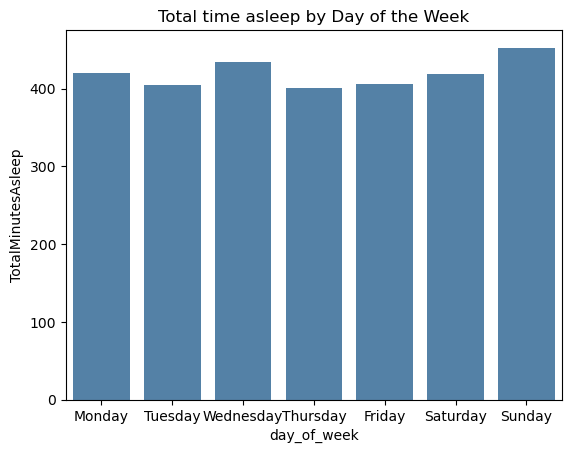

In [194]:
#visualise the sleep time 
sns.barplot(x = "day_of_week", y = "TotalMinutesAsleep", data = activity_summary_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],errorbar=None, color = "steelblue")
plt.title("Total time asleep by Day of the Week")
plt.show()

This tells us that the least amount of sleep was taken on Thursday and Fridays while the most amount of sleep was taken on Sunday probably due to having an early night to start the week the next day.We can also see that users slept longer on Wednesdays and Mondays as well probably due to the start of the week and the middle of the week. This could also be representative of users being less active or taking more steps on these days as well.

### Sedentary vs Active Users

In [180]:
activity_summary_df.head(3)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,Wednesday
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,Friday


In [181]:
user_type = activity_summary_df[["SedentaryMinutes","VeryActiveMinutes"]].mean()


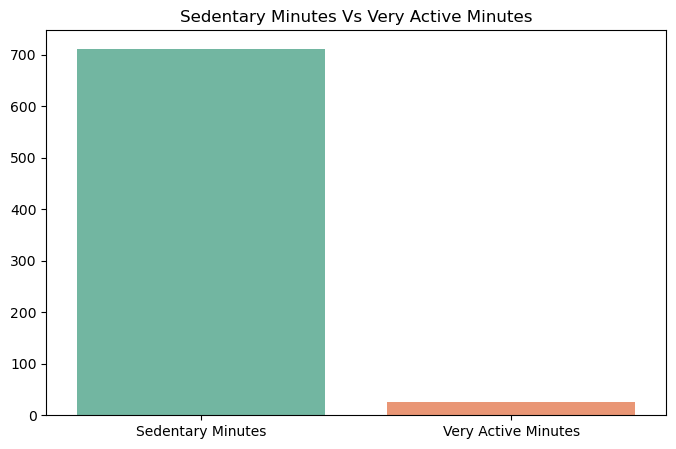

In [182]:
# plot the graph
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=["Sedentary Minutes", "Very Active Minutes"], y=user_type, palette="Set2")
plt.title("Sedentary Minutes Vs Very Active Minutes")
plt.grid(False)

Noticeably, there exists a substantial disparity between the time spent on Sedentary Minutes and Very Active Minutes. This observation underscores that the majority of users tend to allocate more time to less active pursuits. Several factors may contribute to this discrepancy. One plausible explanation could be linked to the day of the week, as illustrated in our 'Steps Taken Throughout the Week' bar plot. This visual representation indicates that most users exhibit higher activity levels on Saturdays. Such a trend might suggest that Bellabeat users predominantly belong to the working class, with potentially limited availability for physical activity during weekdays.

### Total Calories Burned by Day of the Week

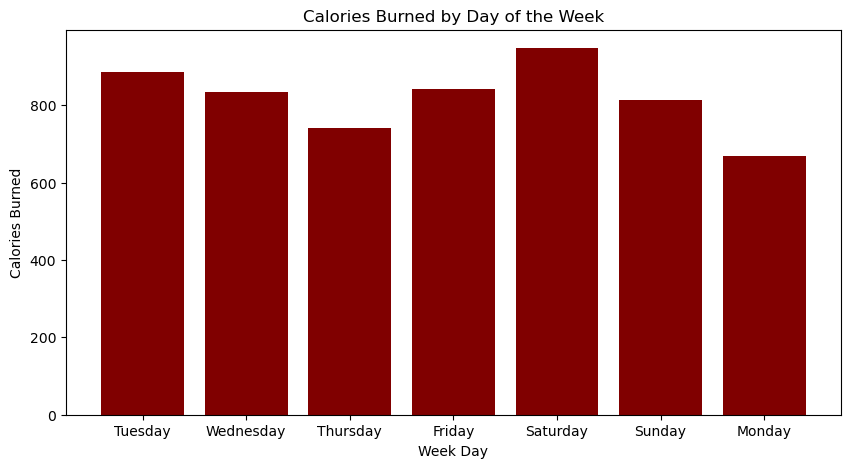

In [183]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merged_df.WeekDay, merged_df.Calories, color = "maroon")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid(False)

plt.show()


In this plot we can see the variation in calories burned across different days of the week. The highest number of calories are burned on Saturdays while the lowest calories are burned on Mondays.

The higher calorie burn on Saturday is expected as we've seen in our "Steps taken throughout the Week" plot as it is the weekend and more people have more time for physical activities. The lower calorie burn is intriguing as in previous plots we have noted that Mondays also have a significant number of steps taken on that day however in another plot we do notice that Mondays also have a high number of total time asleep for users. It could explain as mentioned before that work commitments may have some contribution to this trend. 

## Act Phase

### Recommendations

Based on the analyses done on the users of the fitbit devices, the following recommendations can be put forth to the stakeholders.



1. Seeing as there is a positive correlation between the steps users take and the calories they burn, users may need an incentive to continue taking more steps or even increase their daily steps. This could come from offering rewards, challenges, and/or curating personalised achievements by way of notifications or badges that users can see to encourage users to want to reach their target goals.

2. Users seem to spend most of the time awake in bed before falling asleep. This can affect a person's activity the next day. Notifications can be sent to users to alert them of their sleep time or sleep schedule once they've built one. By doing so, users will equate the notification to time to sleep.

3. The steps taken average around 7,500 daily besides on Sundays which the steps are quite low. Users can be encouraged to set a daily step target by sending them notifications or setting off alarms when their daily steps have not reached a particular number at a particular time of the day. This can motivate users to want to move around in order to reach the daily step target goal.

4. Throught further research, we can find out based on the varying activity levels of users for example very active users can be provided further metrics and information that they can review in order to continue or increase their daily activity such as information about meals, diets, intense workouts, intense challenges, competitions and so on. While the 'less active' users can be provided information that is motivating for instance personal health goals, information about walking events, challenges, walking buddies, walking clubs etc in order to get to be at the 'very active' activity level